<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---
***Name:*** Shreyans Kothari | ***UNI:*** sk4819

## Model Submission Guide: World Happiness Classification Competition
Let's share our models to a centralized leaderboard, so that we can collaborate and learn from the model experimentation process...

**Instructions:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model 
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

In [2]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 


Data downloaded successfully.


In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


In [4]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train.head()

In [ ]:
y_train_labels

In [5]:
df = pd.DataFrame({"Country or region":X_train['Country or region'],"gdp": X_train['GDP per capita'],"social_support": X_train['Social support'],
                   "health": X_train['Healthy life expectancy'],
                   "freedom":X_train['Freedom to make life choices'],"generosity": X_train['Generosity'] ,
                   "corrupt_percep": X_train['Perceptions of corruption'], "name":X_train.name,
                   "region": X_train.region, "subregion": X_train['sub-region'], 
                   "terrorist": X_train['Terrorist_attacks'], "happy": y_train_labels})

### Exploring Bivariate Relationship
In this section, I explore the bivariate relationship between all features, and the bivariate realtionship between the target variable and a handful of  features.

In [6]:
df.head()

,Country or region,gdp,social_support,health,freedom,generosity,corrupt_percep,name,region,subregion,terrorist,happy
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000,Very High
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000,Low
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000,Low
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111,High
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000,Very High


#### Bivariate relationships between all features

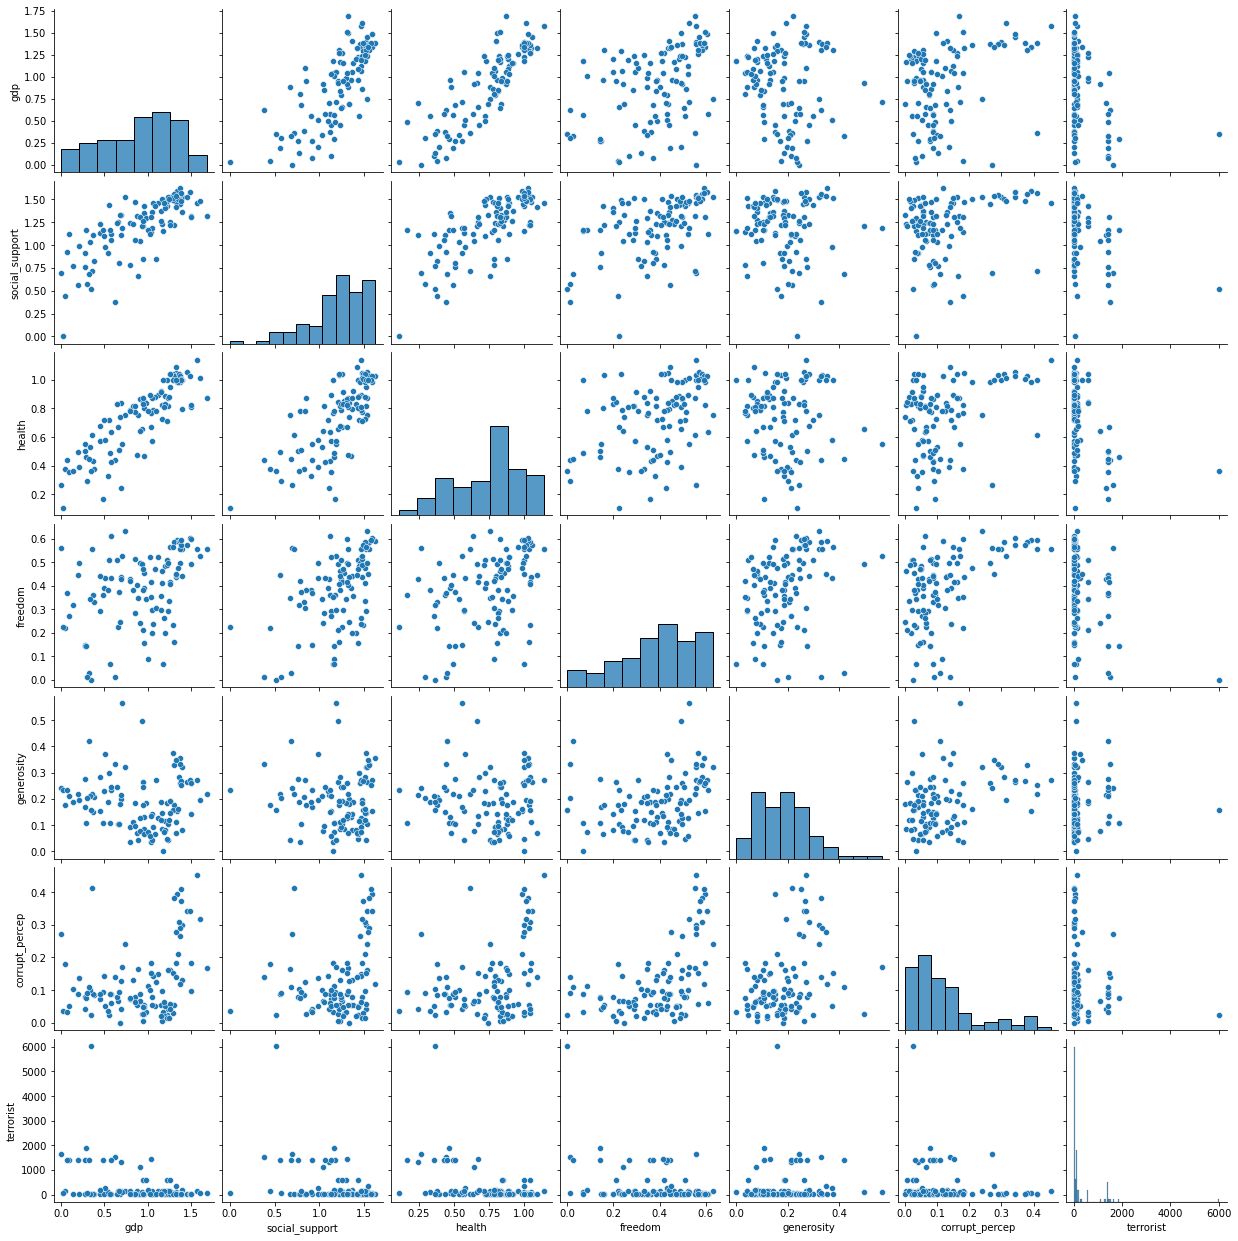

In [7]:
sns.pairplot(df)

Here, we explore the bivariate relationship between the features. We see that most of them are positively related, except for with the variable that signifies terrorist attacks. As expected, GDP per capita and health have a strong positive relationship. Similarly, GDP per capita and social support are also strongly positively related. Additionally, health and social support also have a strong positive relationship

#### Bivariate relationship with the target:
I chose to explore the bivariate relationship between happiness and three features: Social Support, GDP per capita, health, and freedom to make life choices. In this section I expand on my findings. 

**Happiness against Social Support**

In [8]:
df['happy'] = df['happy'].astype('category')
df['happy'].cat.reorder_categories(["Very High", "High", "Average", "Low", "Very Low"], inplace = True)
df = df.sort_values('happy')

In [9]:
df.groupby('happy').describe()['social_support']

,count,mean,std,min,25%,50%,75%,max
happy,,,,,,,,
Very High,20.0,1.491350,0.090114,1.310,1.46750,1.5125,1.55025,1.624
High,24.0,1.406125,0.110672,1.219,1.31725,1.4505,1.49200,1.529
Average,19.0,1.231895,0.156411,0.782,1.15150,1.2520,1.31550,1.465
Low,21.0,1.037381,0.225193,0.666,0.84200,1.0550,1.22500,1.427
Very Low,20.0,0.830900,0.338268,0.000,0.57125,0.9190,1.11675,1.265


Text(0, 0.5, 'Social Support')

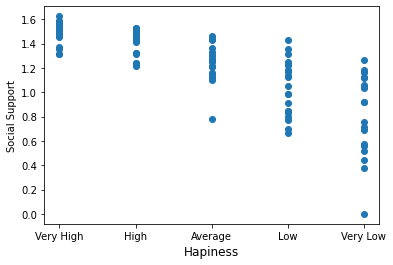

In [10]:
plt.scatter(df['happy'], df['social_support'])
plt.xlabel("Hapiness", size = 12)
plt.ylabel("Social Support")

We see that different values of social_support are clustered around different levels of happiness. Stronger social support is associated with higher levels of happiness. Values of social support are pretty spread out for Very Low level of happiness- social_support might not be the strongest indicator for happiness. 

**Happiness against GDP per capita**

In [11]:
df.groupby('happy').describe()['gdp']

,count,mean,std,min,25%,50%,75%,max
happy,,,,,,,,
Very High,20.0,1.395500,0.112835,1.159,1.33825,1.3765,1.41525,1.684
High,24.0,1.135583,0.241214,0.642,1.04700,1.2035,1.25925,1.572
Average,19.0,0.952684,0.216480,0.493,0.86600,1.0020,1.05900,1.263
Low,21.0,0.649000,0.309170,0.000,0.45000,0.6570,0.88600,1.100
Very Low,20.0,0.378150,0.263263,0.026,0.25325,0.3295,0.51125,0.949


Text(0, 0.5, 'GDP per capita')

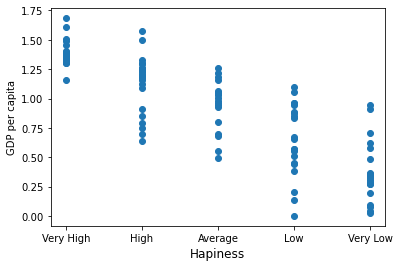

In [12]:
plt.scatter(df['happy'], df['gdp'])
plt.xlabel("Hapiness", size = 12)
plt.ylabel("GDP per capita")

We see a strong relationship between happiness and GDP per capita. Very High, High, and Average levels of happiness are associated with higher levels of GDP per capita. Low and Very Low levels of happiness are associated with lower levels GDP per capita. Compared to Social Support, GDP would be a better indicator of happiness because the values of GDP within each category of happiness are relatively a little less spread out. 

**Happiness against health**

In [13]:
df.groupby('happy').describe()['health']

,count,mean,std,min,25%,50%,75%,max
happy,,,,,,,,
Very High,20.0,0.981650,0.072351,0.795,0.98600,0.9990,1.02650,1.052
High,24.0,0.879000,0.114576,0.713,0.81100,0.8515,0.90650,1.141
Average,19.0,0.796737,0.171981,0.245,0.73100,0.7890,0.88200,1.042
Low,21.0,0.582286,0.181653,0.268,0.46900,0.5710,0.75200,0.874
Very Low,20.0,0.452550,0.160364,0.105,0.37525,0.4460,0.53775,0.831


Text(0, 0.5, 'Healthy Life Expectancy')

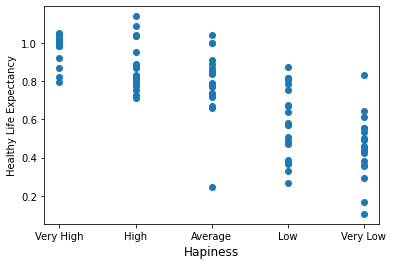

In [14]:
plt.scatter(df['happy'], df['health'])
plt.xlabel("Hapiness", size = 12)
plt.ylabel("Healthy Life Expectancy")

Before I explored this bivariate relationship, I expected hapiness and healthy life expectancy to have a strong correlation. Here, we can see that Very High, High and Average levels of happiness are indicated with relatively higher values of health, and Very Low, Low values of happiness are associated with worse life expectancy.

**Happiness against Freedom to make life choices***

In [15]:
df.groupby('happy').describe()['freedom']

,count,mean,std,min,25%,50%,75%,max
happy,,,,,,,,
Very High,20.0,0.535200,0.069642,0.357,0.48950,0.5605,0.58650,0.603
High,24.0,0.428750,0.121827,0.159,0.38800,0.4665,0.50025,0.631
Average,19.0,0.346474,0.139450,0.067,0.24000,0.3890,0.44050,0.521
Low,21.0,0.355095,0.122911,0.066,0.29500,0.3720,0.40100,0.609
Very Low,20.0,0.264750,0.176527,0.000,0.14275,0.2550,0.38525,0.555


Text(0, 0.5, 'Freedom to Make Life Choices')

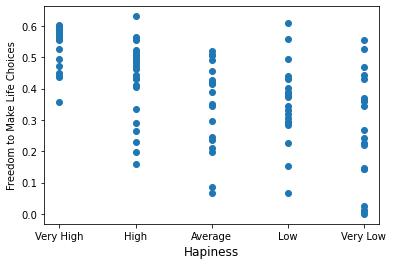

In [16]:
plt.scatter(df['happy'], df['freedom'])
plt.xlabel("Hapiness", size = 12)
plt.ylabel("Freedom to Make Life Choices")

Happiness and freedom have a positive relationship but it doesn't seem particularly strong. Values of freedom are spread out throughout different levels of happiness. Based off this visualization, this would not be a strong relationship to predict happiness. 

## 2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())]) #changed scaler

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [50]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [51]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(104, 26)

### Examining features through feature selection
In this section, I examine the features in an attempt to conduct feature selection. I do this through two models: chi2 and Logsitic Regression.

In [118]:
col_names = np.append(X_train.columns, preprocess.named_transformers_['cat'][1].get_feature_names())
col_names = col_names[~np.isin(col_names, ('Country or region', 'name', 'region', 'sub-region'))]
col_names

array(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Terrorist_attacks', 'x0_Africa',
       'x0_Americas', 'x0_Asia', 'x0_Europe', 'x0_Oceania',
       'x1_Australia and New Zealand', 'x1_Central Asia',
       'x1_Eastern Asia', 'x1_Eastern Europe',
       'x1_Latin America and the Caribbean', 'x1_Northern Africa',
       'x1_Northern America', 'x1_Northern Europe',
       'x1_South-eastern Asia', 'x1_Southern Asia', 'x1_Southern Europe',
       'x1_Sub-Saharan Africa', 'x1_Western Asia', 'x1_Western Europe'],
      dtype=object)

In [126]:
pd.DataFrame(preprocessor(X_train), columns=col_names).head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,x0_Africa,x0_Americas,x0_Asia,...,x1_Latin America and the Caribbean,x1_Northern Africa,x1_Northern America,x1_Northern Europe,x1_South-eastern Asia,x1_Southern Asia,x1_Southern Europe,x1_Sub-Saharan Africa,x1_Western Asia,x1_Western Europe
0,0.833135,0.835591,0.666023,0.695721,0.141343,0.291391,0.028562,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.526128,0.410099,0.624517,0.548336,0.075972,0.362031,0.002823,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.225653,0.510468,0.260618,0.526149,0.365724,0.189845,0.000332,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.735154,0.932882,0.688224,0.461173,0.075972,0.092715,0.020693,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.828979,0.937192,0.862934,0.882726,0.568905,0.657837,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Chi-Squared**

In [130]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chisq = SelectKBest(chi2, k = 5)
chisq.fit(preprocessor(X_train), y_train_labels)

kbest = col_names[chisq.get_support(indices=True)]
kbest

array(['x0_Africa', 'x0_Europe', 'x1_Northern Europe',
       'x1_Sub-Saharan Africa', 'x1_Western Europe'], dtype=object)

**Logistic Regression**

In [123]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1',solver = 'saga', max_iter = 10000)
lr.fit(preprocessor(X_train), y_train_labels)
col_names[(lr.coef_!=0)[0]]

array(['x1_Central Asia', 'x1_Northern Africa', 'x1_Southern Europe'],
      dtype=object)

I ran two feature selection models; first, I ran a chi2 model with selectkbest function (with k set to 5) and then the Logistic Regression model with penalty set to l1. In both cases, the most important features (that seem to predict happiness the best) are the dummy variables for regions. This somewhat makes sense as there is a huge disparity among these regions in terms of wealth, education, and life expectancy- three indicators that, I believe, are strongly correlated with overall happiness. Although, I was surpised to see that the two models don't agree on which the top features are among the region dummies. 

## 3. Fit model on preprocessed data and save preprocessor function and model 


**Model 1: RandomForestClassifier***

In [136]:
from sklearn.model_selection import GridSearchCV

In [259]:
# Running GridSearchCV on RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': np.arange(1, 10, 1),
    'n_estimators': np.arange(100, 1000, 100)
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid)
grid_rf.fit(preprocessor(X_train), y_train_labels)
print("best parameters: {}".format(grid_rf.best_params_))

best parameters: {'max_depth': 5, 'n_estimators': 100}


In [260]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.
# This might be overfitting

0.9615384615384616

***Model 2: Logistic Regression***

In [237]:
# Running GridSearchCV on Logistic Regression
param_grid = {
    'C': np.arange(0, 10, 0.5),
    'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(LogisticRegression(solver = 'saga', max_iter = 10000), param_grid)
grid_lr.fit(preprocessor(X_train), y_train_labels)
print("best parameters: {}".format(grid_lr.best_params_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:790: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:792: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1. / C
/opt/anaconda3/lib/python3.8/site-packages/sk

best parameters: {'C': 7.5, 'penalty': 'l1'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.20238095        nan 0.53857143 0.6147619  0.56761905 0.6252381
 0.60571429 0.6252381  0.6347619  0.6252381  0.6252381  0.64428571
 0.6252381  0.64428571 0.6447619  0.64428571 0.6352381  0.64428571
 0.6352381  0.64428571 0.62571429 0.64428571 0.6447619  0.64428571
 0.65428571 0.64428571 0.65428571 0.64428571 0.65428571 0.64428571
 0.66380952 0.64428571 0.66380952 0.64428571 0.66380952 0.64428571
 0.65380952 0.64428571 0.65380952 0.6347619 ]
  warnings.warn(


In [173]:
model2 = LogisticRegression(C = 8, penalty = 'l1', solver = 'saga', random_state= 12)
model2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8076923076923077

***Model 3: SVC***

In [182]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(SVC(),param_grid)
grid_svc.fit(preprocessor(X_train), y_train_labels)
print("best parameters: {}".format(grid_svc.best_params_))

best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [183]:
model3 = SVC(C = 100, gamma = 0.01, kernel= 'rbf')
model3.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model3.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.7884615384615384

***Model 4: Voting Classifier***

In [271]:
from sklearn.ensemble import VotingClassifier
model4 = VotingClassifier(estimators=[('rf', model), ('lr', model2), ('svc', model3)], voting = 'hard')
model4.fit(preprocessor(X_train), y_train_labels)
model4.score(preprocessor(X_train), y_train_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8365384615384616

In [266]:
model5 = RandomForestClassifier(n_estimators=400, max_depth=8, random_state= 12)
model5.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model5.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

1.0

In [268]:
from sklearn.ensemble import VotingClassifier
model4 = VotingClassifier(estimators=[('rf', model),  ('rf2', model5)], voting = 'hard')
model4.fit(preprocessor(X_train), y_train_labels)
model4.score(preprocessor(X_train), y_train_labels)

0.9711538461538461

I ran 4 models: Random Forest Classifier, Logitic Regression, Support Vector Classifier, and Voting Classifier. For Random Forest, Logitic Regression, and Support Vector Classifier, I ran GridSearch CV to tune the hyperparameters. In the case of Random forests, initially the GridSearchCV returned hyperparameters that gave a ~91% train set score. When I predicted the test set using this model, the model performed fairly well (relative to all the other models in the leader board).

Next, I used GridSerchCV to hypertune the Logitic Regression model. The model retuned some convergence warnings inspite of providing it a max_iter parameter. Using the tuned hyper-parameters, I ran the logistic model to get a training set score of around 80%. Worse than the Random Forest model, but still fairly performing well. 

Then I ran GridSearchCV on a Support Vector Classifier model. Using the best parameters given by GridSearchCV, I got a train set score of ~ 0.788. This was performing almost as well (or bad) as the Logistic Regression model. 

Finally, I combined all these models in a voting classifier, using the best paramters given back by GridSearchCV for all three models. This model 4 performed quite well and returned a training set score of ~84%. 

I thought I could get a better test score from just the random forest classifier- I tried a few different sets of parameters and ended up with one that gave me a 1.0 train set score. This model performed the best of all my models on the test set and scored me a position at #32 on the leaderboard. For this last model, I used n_estimators = 400 and max_depth = 8.

I thought I could improve my test set score by adding the second random forest classifier model in my ensemble model. This final ensemble model ran quite well (almost too well, giving a training set score of ~97%. This landed me at #24 on the leader board. This model performed the best of all the models I ran.

**The positions on the leaderboard listed here might change, depending on other models

#### Save preprocessor function to local "preprocessor.zip" file

In [188]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [189]:
#pip install pydot

In [269]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [151]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://c3maq947kb.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl) 

AI Modelshare Username:········
AI Modelshare Password:········
AI Model Share login credentials set successfully.


In [152]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [270]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model4.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 282

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1289


In [272]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, max_depth=5)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip")

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([2,3], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([3,4], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


In [ ]:
# Or you can experiment with deep learning models: 
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

In [ ]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

In [ ]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)